In [73]:
import os, pickle

import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = '14'

from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

ignore = ["peak_height"]
colors = ["#" + c for c in "f2ff49-ff4242-fb62f6-645dd7-b3fffc-3e442b-6a7062-48284a".split("-")]

In [74]:
path = os.path.join(os.getcwd(), "..", "predictions")
prediction_files = os.listdir(path)
ignore_files     = [i + ".dat" for i in ignore]


prediction_files = [os.path.join(path, file) for file in prediction_files if file not in ignore_files]

In [75]:
def get_statistics(file_path, roc_ax = None, color = None):
    predictions, targets = pd.read_pickle(file_path)
    predictions = minmax_scale(predictions)

    metric_dict              = {}
    metric_dict['name']      = os.path.split(file_path)[1][:-4]
    metric_dict['accuracay'] = accuracy_score(targets, predictions > 0.5)
    metric_dict['AUC']       = roc_auc_score(targets, predictions)

    if roc_ax:
        x, y, _ = roc_curve(targets, predictions)
        
        roc_ax.plot(x, y, color = color, label = metric_dict['name'])
        
    return metric_dict



,accuracay,AUC
name,,
1D_conv,0.855,0.906
feed_forward_network,0.796,0.870
LSTM,0.858,0.912
peak_height_adjusted,0.836,0.875
TCN,0.798,0.891
umap_fft,0.804,0.867
umap_real_time,0.746,0.805
xgb_real_time,0.821,0.875


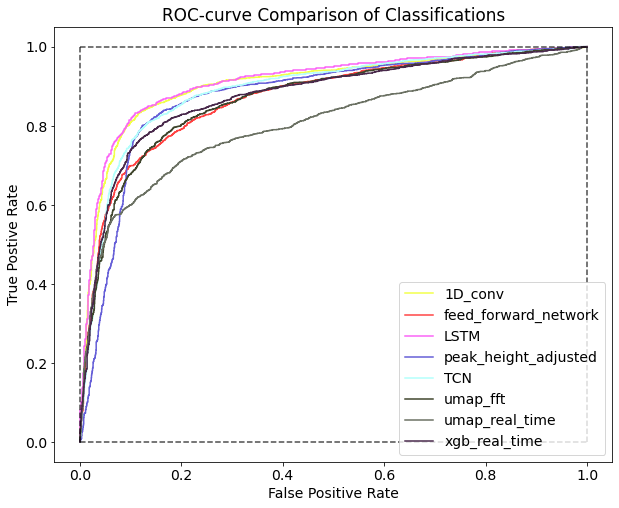

In [76]:
list_of_metric_dicts = []
fig, ax              = plt.subplots(figsize = (10, 8))

for file, c in zip(prediction_files, colors):
    metrics = get_statistics(file, roc_ax = ax, color = c)
    list_of_metric_dicts.append(metrics)

dict_of_lists = {'name': [],
                 'accuracay': [],
                 'AUC': []}
for metrics in list_of_metric_dicts:
    for key in dict_of_lists.keys():
        dict_of_lists[key].append(metrics[key])

df = pd.DataFrame(dict_of_lists).set_index("name", drop = True)

ax.legend()
ax.set(
    title  = "ROC-curve Comparison of Classifications",
    xlabel = "False Positive Rate",
    ylabel = "True Postive Rate"
) 

ax.hlines((0, 1), 0, 1, ls = "--", alpha = 0.7, color = "k")
ax.vlines((0, 1), 0, 1, ls = "--", alpha = 0.7, color = "k")


df_rounded = df.round(3)
df_rounded

In [77]:
df_rounded.to_clipboard()